In [1]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
# Use this command if you didn't save your credentials:
service = QiskitRuntimeService(channel="ibm_quantum", token="01bc4119753462f3d43233dd90a7f9abbc2919464ff5d986afceaac346f24ade5bde4f8bd38a1e44feaaf74996f1036d353eee6400b50194aff8571b2502547d")

In [4]:
backend = service.backend("ibmq_qasm_simulator")

In [5]:
def oracle_gate(n, k):
    oracle_circuit = QuantumCircuit(n+1, name="Oracle")
    
    # Configurar el oráculo
    for qubit in range(n):
        if (k >> qubit) & 1:
            oracle_circuit.x(qubit)
    
    # Implementar el oráculo con compuertas CX (CNOT)
    oracle_circuit.cx(range(n), n)
    
    # Deshacer los cambios en la entrada
    for qubit in range(n):
        if (k >> qubit) & 1:
            oracle_circuit.x(qubit)
    
    return (oracle_circuit.to_gate(),oracle_circuit.draw(output="mpl"))

In [6]:
def grover_circuit(n, oracle_gate, iterations):
    grover_circuit = QuantumCircuit(n+1, n)
    
    # Inicializar los qubits en superposición
    grover_circuit.h(range(n+1))
    
    # Implementar Grover's algorithm
    for _ in range(iterations):
        grover_circuit.append(oracle_gate, range(n+1))
        grover_circuit.h(range(n+1))
        grover_circuit.x(range(n+1))
        grover_circuit.h(n)
        
        # Implementar el oráculo con compuertas CX (CNOT)
        grover_circuit.append(oracle_gate, range(n+1))
        
        grover_circuit.h(n)
        grover_circuit.x(range(n+1))
        grover_circuit.h(range(n+1))
    
    # Medir los qubits
    grover_circuit.measure(range(n), range(n))
    
    return (grover_circuit,grover_circuit.draw(output="mpl"))

In [7]:
# Lista de ejemplo

#Lista original
#lista = [25, 37, 47, 29, 8, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la primera posición
#lista = [8, 37, 47, 29, 25, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la última posición
lista = [25, 37, 47, 29, 22, 12, 44, 30, 24, 33, 15, 39, 46, 5, 8]
# Valor a buscar
k = 8

In [8]:
# Encontrar la posición de k en la lista
posicion = lista.index(k)

# Número de bits necesario para representar la lista
n = len(bin(max(lista))) - 2

In [9]:
# Crear el oráculo y el circuito de Grover
oracle,draw0 = oracle_gate(n, posicion)
grover_circuito,draw = grover_circuit(n, oracle, iterations=1)

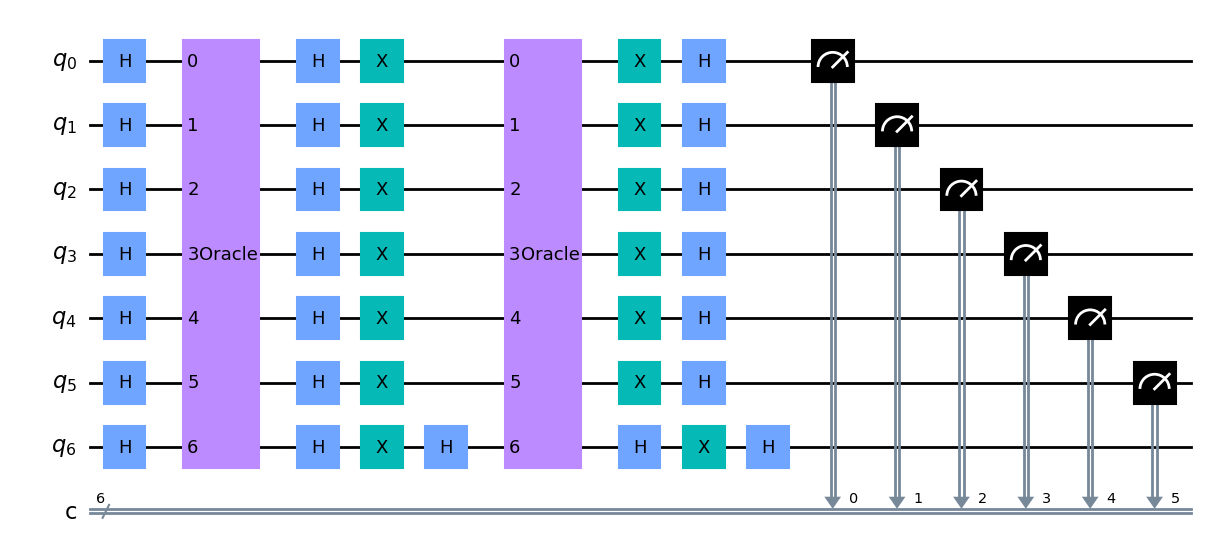

In [10]:
draw

In [14]:
job = Sampler(backend).run(transpile(grover_circuito, backend))
print(f"job id: {job.job_id()}")

job id: cldetj446cn44kduasqg


In [15]:
result = job.result()
print(result)

SamplerResult(quasi_dists=[{39: 0.01025, 31: 0.01875, 46: 0.01575, 57: 0.0135, 38: 0.01425, 54: 0.0175, 27: 0.01775, 29: 0.019, 3: 0.015, 1: 0.01325, 41: 0.0155, 30: 0.0165, 21: 0.01775, 6: 0.018, 36: 0.01325, 0: 0.01725, 43: 0.01725, 10: 0.012, 2: 0.013, 13: 0.018, 42: 0.01725, 26: 0.0155, 62: 0.01875, 32: 0.016, 61: 0.01425, 25: 0.0155, 52: 0.015, 22: 0.0175, 50: 0.01475, 63: 0.01275, 34: 0.01475, 56: 0.01725, 58: 0.015, 53: 0.017, 17: 0.0155, 4: 0.01425, 23: 0.01325, 35: 0.015, 9: 0.01825, 55: 0.012, 7: 0.015, 60: 0.01075, 51: 0.0195, 8: 0.01475, 18: 0.01725, 15: 0.0165, 11: 0.015, 59: 0.011, 12: 0.01625, 16: 0.01525, 47: 0.01975, 44: 0.0145, 49: 0.017, 28: 0.01825, 20: 0.016, 24: 0.0145, 45: 0.017, 14: 0.01725, 40: 0.015, 48: 0.0135, 37: 0.0195, 33: 0.0155, 5: 0.0135, 19: 0.0145}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


In [30]:
quasi_dist = result.quasi_dists[0]
#print(quasi_dist.binary_probabilities())
print(quasi_dist.keys())

dict_keys([39, 31, 46, 57, 38, 54, 27, 29, 3, 1, 41, 30, 21, 6, 36, 0, 43, 10, 2, 13, 42, 26, 62, 32, 61, 25, 52, 22, 50, 63, 34, 56, 58, 53, 17, 4, 23, 35, 9, 55, 7, 60, 51, 8, 18, 15, 11, 59, 12, 16, 47, 44, 49, 28, 20, 24, 45, 14, 40, 48, 37, 33, 5, 19])


In [18]:
# Simular el circuito
simulador = Aer.get_backend('qasm_simulator')
resultados = simulador.run(transpile(grover_circuito, simulador)).result()
conteos = resultados.get_counts()

In [31]:
import matplotlib.pyplot as plt
import numpy as np

estados= list(quasi_dist.keys())
values = list(quasi_dist.values())



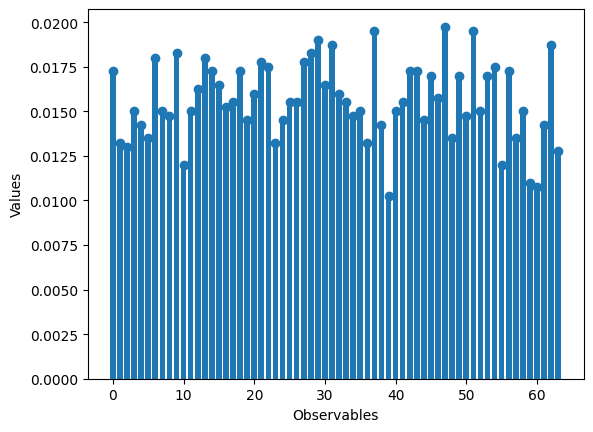

In [35]:
# plotting graph
plt.bar(estados,values)
plt.errorbar(estados, values, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

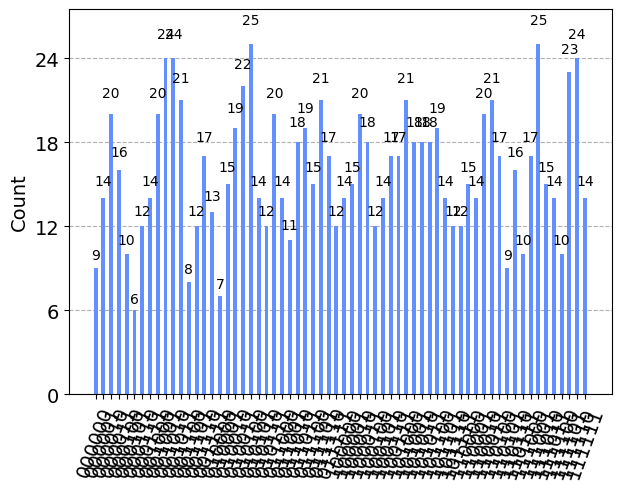

In [36]:
# Obtener los resultados y mostrar el histograma
plot_histogram(conteos)